In [122]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [123]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [124]:
NUM_CLASSES = 36

# Dataset reading

In [125]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [126]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [128]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [129]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_14 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 36)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466 (5.73 KB)

 Trainable params: 1,466 (5.73 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# # Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [131]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [132]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.0078 - loss: 3.5917
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 1: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0277 - loss: 3.5554 - val_accuracy: 0.0276 - val_loss: 3.4923
Epoch 2/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0312 - loss: 3.5185
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 2: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0277 - loss: 3.5146 - val_accuracy: 0.0552 - val_loss: 3.4513
Epoch 3/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0547 - loss: 3.5103
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 3: finished saving model to model/keypoint_classifier/keypoint_classifier.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

In [133]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8011 - loss: 0.7588


In [134]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [135]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[1.3157628e-09 1.8394387e-07 1.6818121e-04 3.6254570e-02 1.1513885e-01
 3.3205083e-01 1.0796604e-01 8.9036234e-02 2.6952866e-01 4.9856052e-02
 2.2096747e-09 4.0974806e-09 3.4880221e-09 2.1936261e-08 2.2769058e-09
 3.3838955e-08 1.1342433e-07 2.2686791e-08 2.9670616e-10 1.0839180e-09
 1.2274653e-08 2.1180604e-08 1.8420383e-09 2.9279688e-09 9.6418029e-09
 1.7401202e-08 8.7977303e-10 1.2928910e-08 1.3340845e-08 1.3538215e-09
 4.3376919e-10 2.5166782e-09 4.6988955e-09 1.4756459e-09 1.7154188e-07
 4.2011695e-08]
5


# Confusion matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


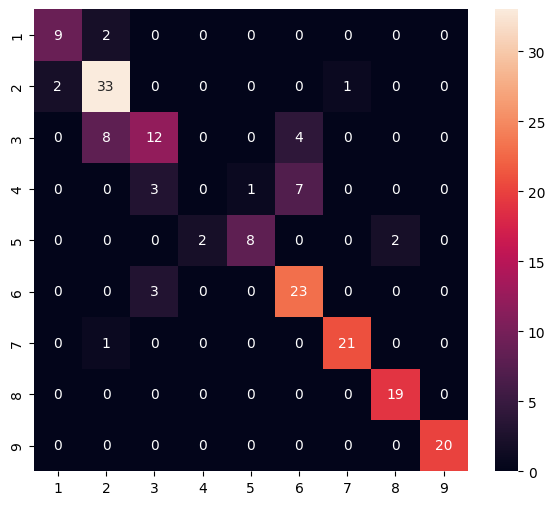

Classification Report
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       0.75      0.92      0.82        36
           3       0.67      0.50      0.57        24
           4       0.00      0.00      0.00        11
           5       0.89      0.67      0.76        12
           6       0.68      0.88      0.77        26
           7       0.95      0.95      0.95        22
           8       0.90      1.00      0.95        19
           9       1.00      1.00      1.00        20

    accuracy                           0.80       181
   macro avg       0.74      0.75      0.74       181
weighted avg       0.76      0.80      0.78       181



In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [137]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [138]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmphlhffklk/assets


INFO:tensorflow:Assets written to: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmphlhffklk/assets


Saved artifact at '/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmphlhffklk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_7')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  14210428624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14210418064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14210427472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14210429776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14210429008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14210427664: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1768674393.398400  381474 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1768674393.398409  381474 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2026-01-17 11:26:33.398501: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmphlhffklk
2026-01-17 11:26:33.398798: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2026-01-17 11:26:33.398803: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmphlhffklk
2026-01-17 11:26:33.401166: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2026-01-17 11:26:33.415065: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/tmphlhffklk
2026-01-17 11:26:33.419662: I tensorflow/cc/saved_model/loader.cc:

7996

# Inference test

In [139]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/syedessamuddinkhawaja/Desktop/Extra Projects/Unspoken/venv/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [140]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [141]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [142]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 47 μs, sys: 21 μs, total: 68 μs
Wall time: 75.1 μs


In [143]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3157603e-09 1.8394353e-07 1.6818084e-04 3.6254551e-02 1.1513886e-01
 3.3205083e-01 1.0796606e-01 8.9036152e-02 2.6952866e-01 4.9856078e-02
 2.2096707e-09 4.0974810e-09 3.4880221e-09 2.1936218e-08 2.2769013e-09
 3.3838958e-08 1.1342423e-07 2.2686791e-08 2.9670560e-10 1.0839180e-09
 1.2274653e-08 2.1180567e-08 1.8420385e-09 2.9279634e-09 9.6418029e-09
 1.7401202e-08 8.7977314e-10 1.2928887e-08 1.3340846e-08 1.3538164e-09
 4.3376838e-10 2.5166735e-09 4.6988959e-09 1.4756432e-09 1.7154187e-07
 4.2011617e-08]
5
